# Rigid Regularization

## By Normal <span style='color:orange'>Linear Regression</span>

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()

In [6]:
print(data.data.shape)
print(data.target.shape)

(442, 10)
(442,)


In [7]:
X =data.data
y = data.target

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
lr = LinearRegression()


In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_lr = lr.predict(X_test)

In [17]:
r2_score(y_test,y_pred_lr)

0.4526027629719197

## By Normal <span style='color:orange'>Ridge Regression</span>

In [44]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.2)      #aplpa is hyperparameter

In [45]:
R.fit(X_train,y_train)

Ridge(alpha=0.2)

In [46]:
y_pred_rg = R.predict(X_test)

In [47]:
r2_score(y_test, y_pred_rg)

0.46113836892116755

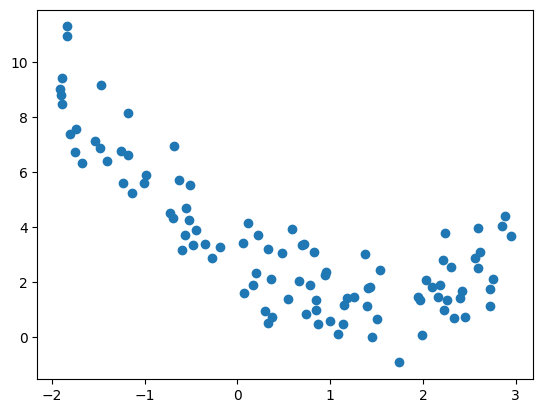

In [51]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

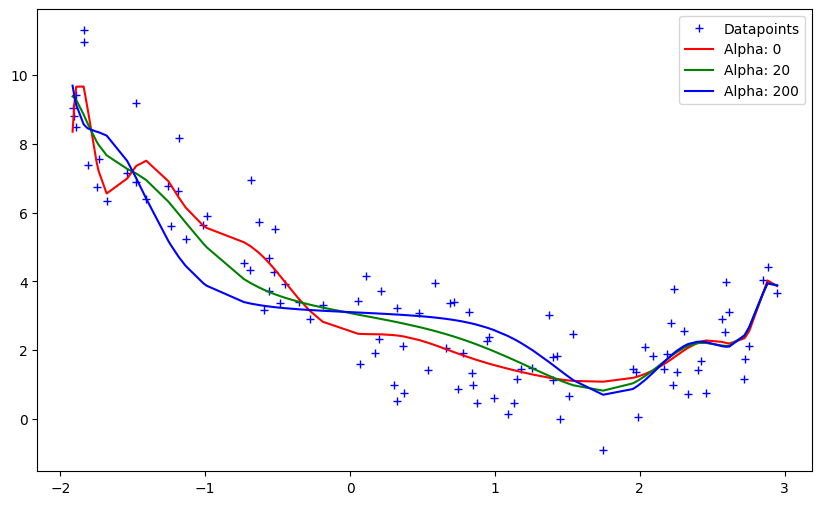

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()